This is an example extracted from large sample data.

In [1]:
#Check memory
!free -m

              total        used        free      shared  buff/cache   available
Mem:         254917      159796       92835           6        2285       93162
Swap:             0           0           0


In [6]:
#load your data

['STUDENTID', 'PRODUCT', 'RLSKILLID', 'QUESTIONID', 'ITEMCORRECTNESS', 'EVENT_TIME', 'TOKEN', 'ANSWERPOSITIONINSESSION', 'CONTEXT', 'SESSIONID', 'SKILLPROGRESSIONORDER', 'SKILLPROGRESSIONSUPERORDER', 'STANDARDSETID', 'DURATION_SECONDS']
-42.49644374847412  seconds.  14680375  rows.


In [8]:
print(len(final_ddf.SKILLID.unique()), len(final_ddf.QUESTIONID.unique()))

1034 55029


In [ ]:
#load library
import PyIRT_SDT as customPyIRT

In [18]:
#Make sure its the correct format
#needs to have: skill_id, question_id, performance

irt_df = final_ddf[['STUDENTID','COMBINED_SKILL_ID','QUESTIONID','ITEMCORRECTNESS']]

#match column synta
irt_df=irt_df.rename(columns={'STUDENTID': 'student_id', 'COMBINED_SKILL_ID': 'skill_id', 
                              'QUESTIONID':'math_question_id', 'ITEMCORRECTNESS':'correctness'})

los=irt_df.skill_id.unique()
print(len(los), ' skills.')
los

1034  skills.


array(['2f11f61e-e69f-e311-9503-005056801da1', 'uwzbrecw',
       '2710f61e-e69f-e311-9503-005056801da1', ..., 'zxcvnmky',
       'lkjhgfqa', 'sgrhnwgd'], dtype=object)

attempting to load skill from local data: yvapiriy
loading time:  0.9885051250457764  for :  33559 (33559, 4)
large correctness values detected, normalizing table
roundValues=True, discretizing values
table size:  (5271, 27)
solving for item parameters...
iteration # 0


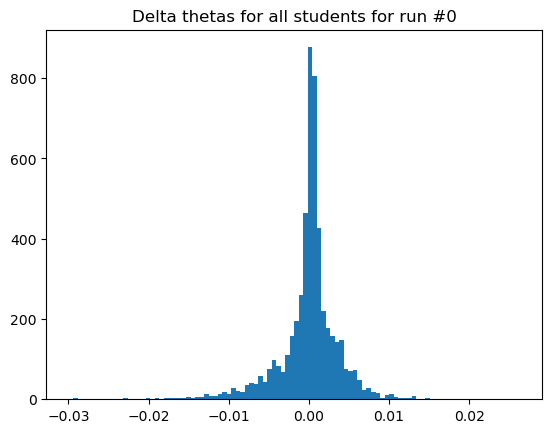

iteration # 1
iteration # 2
iteration # 3
iteration # 4
iteration # 5
iteration # 6
iteration # 7
iteration # 8
iteration # 9
iteration # 10


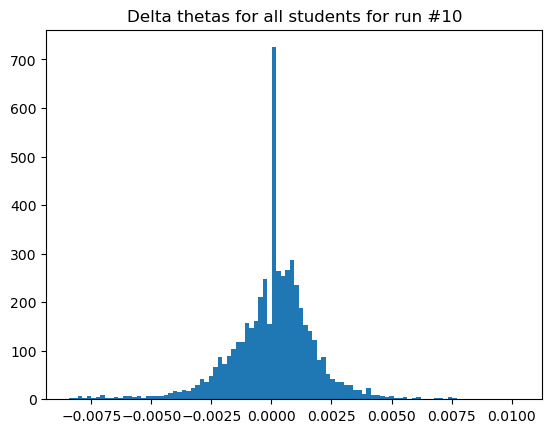

iteration # 11
iteration # 12
iteration # 13
iteration # 14
iteration # 15
iteration # 16
iteration # 17
iteration # 18
iteration # 19
iteration # 20


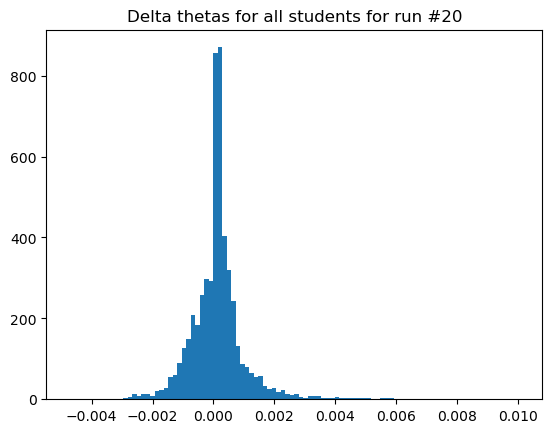

iteration # 21
iteration # 22
iteration # 23
iteration # 24
iteration # 25
iteration # 26
iteration # 27
iteration # 28
iteration # 29
iteration # 30


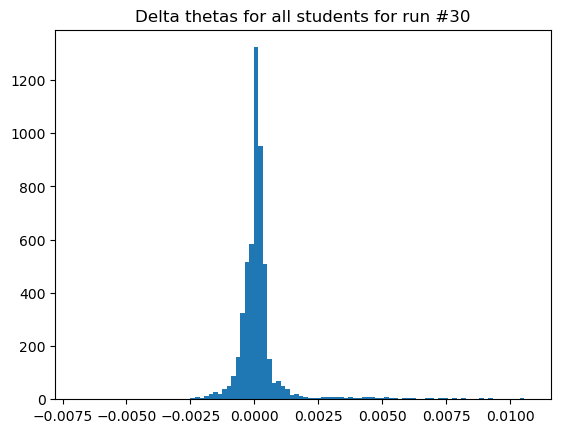

iteration # 31
iteration # 32
iteration # 33
iteration # 34
iteration # 35
iteration # 36
iteration # 37
iteration # 38
iteration # 39
iteration # 40


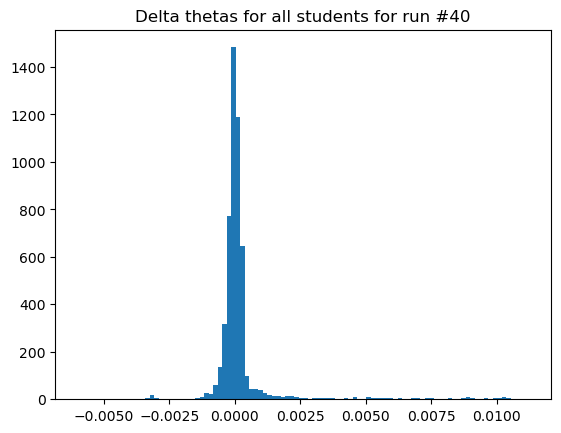

iteration # 41
iteration # 42
iteration # 43
iteration # 44
iteration # 45
iteration # 46
iteration # 47
iteration # 48
iteration # 49
iteration # 50


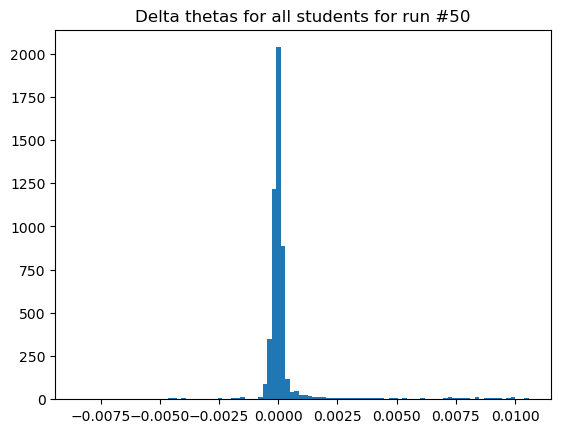

iteration # 51
iteration # 52
iteration # 53
iteration # 54
iteration # 55
iteration # 56
iteration # 57
iteration # 58
iteration # 59
iteration # 60


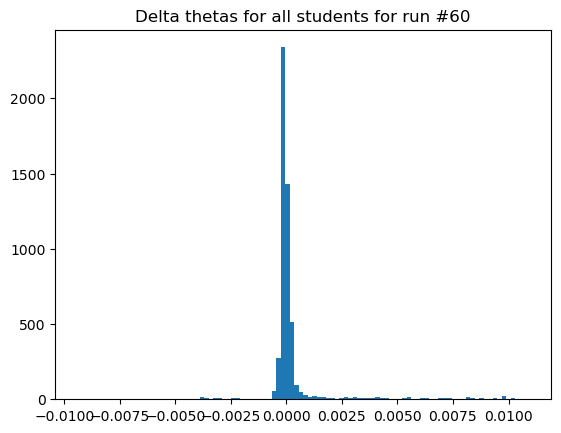

iteration # 61
iteration # 62
iteration # 63
iteration # 64
iteration # 65
iteration # 66
iteration # 67
iteration # 68
iteration # 69
iteration # 70


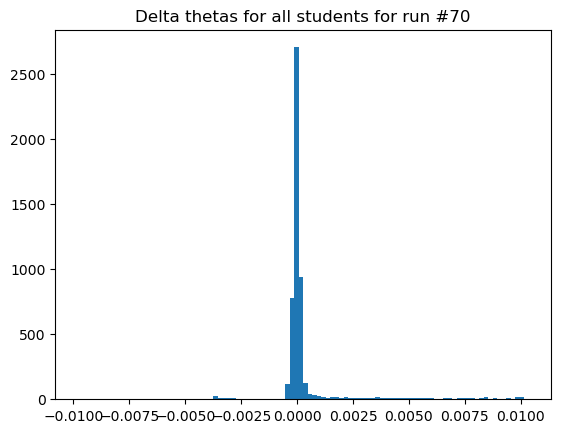

iteration # 71
iteration # 72
iteration # 73
iteration # 74
iteration # 75
iteration # 76
iteration # 77
iteration # 78
iteration # 79
iteration # 80


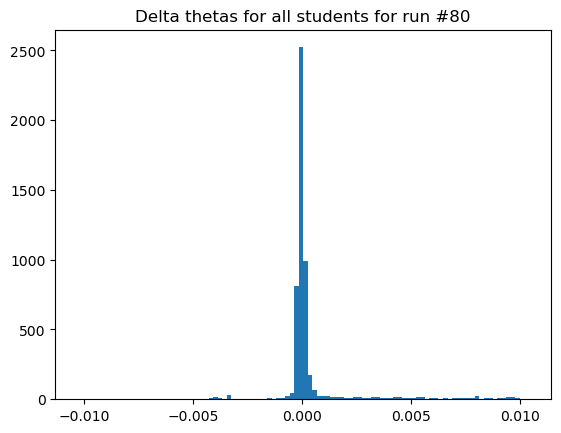

iteration # 81
iteration # 82
iteration # 83
iteration # 84
iteration # 85
iteration # 86
iteration # 87
iteration # 88
iteration # 89
iteration # 90


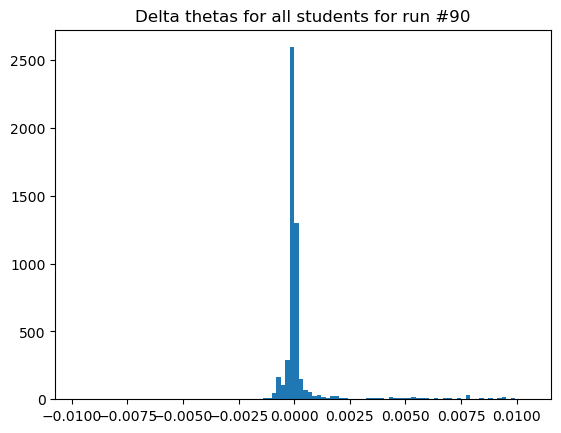

iteration # 91
iteration # 92
iteration # 93
iteration # 94
iteration # 95
iteration # 96
iteration # 97
iteration # 98
iteration # 99
iteration # 100


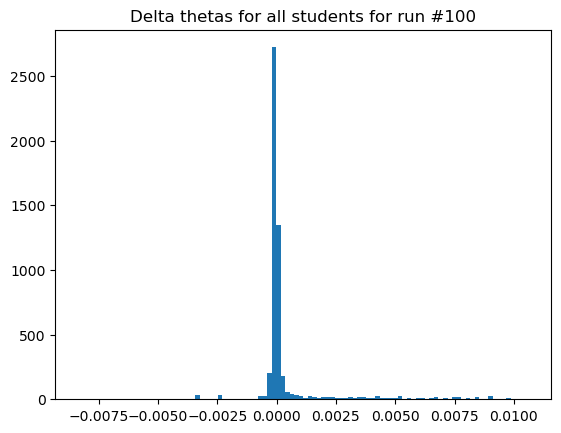

iteration # 101
iteration # 102
iteration # 103
iteration # 104
iteration # 105
iteration # 106
iteration # 107
iteration # 108
iteration # 109
iteration # 110


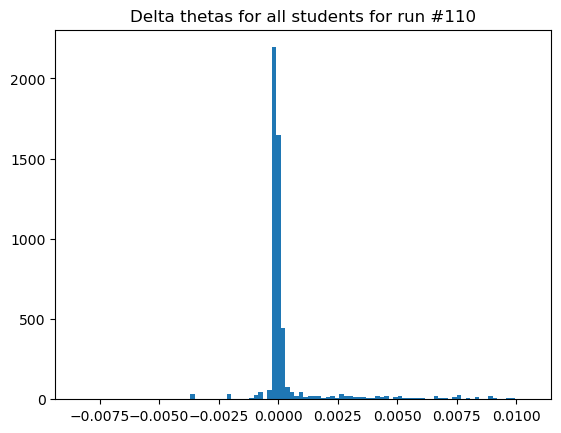

iteration # 111
iteration # 112
iteration # 113
iteration # 114
iteration # 115
iteration # 116
iteration # 117
iteration # 118
iteration # 119
iteration # 120


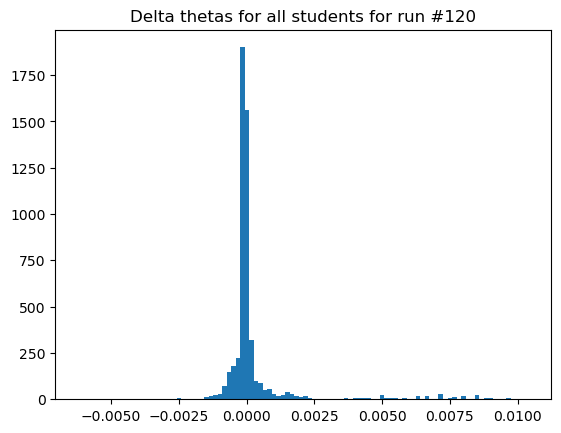

iteration # 121
iteration # 122
iteration # 123
iteration # 124
iteration # 125
iteration # 126
iteration # 127
iteration # 128
iteration # 129
iteration # 130


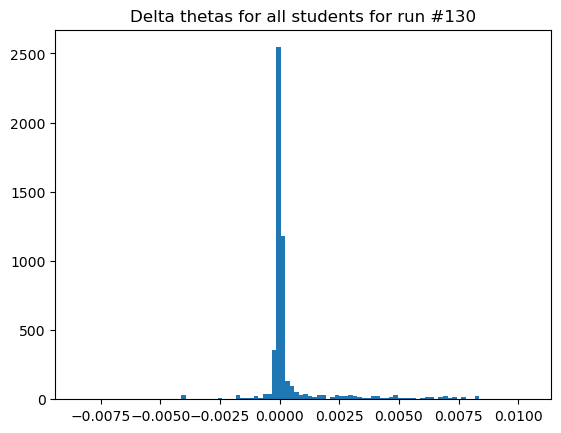

iteration # 131
iteration # 132
iteration # 133
iteration # 134
iteration # 135
iteration # 136
iteration # 137
iteration # 138
iteration # 139
iteration # 140


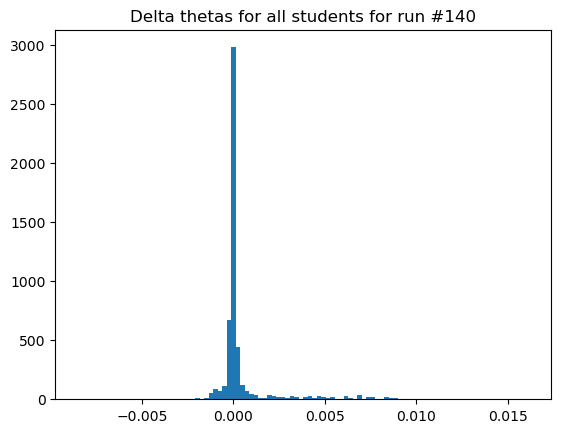

iteration # 141
iteration # 142
iteration # 143
iteration # 144
iteration # 145
iteration # 146
iteration # 147
iteration # 148
iteration # 149
iteration # 150


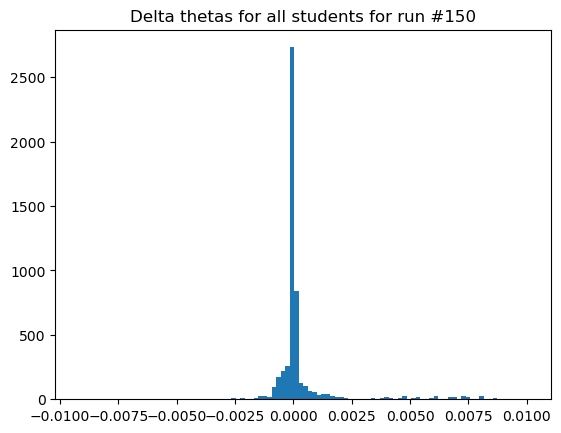

iteration # 151
iteration # 152
iteration # 153
iteration # 154
iteration # 155
iteration # 156
iteration # 157
iteration # 158
iteration # 159
iteration # 160


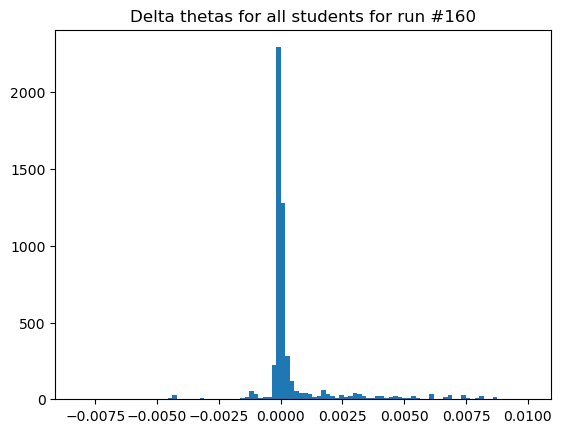

iteration # 161
iteration # 162
iteration # 163
iteration # 164
iteration # 165
iteration # 166
iteration # 167
iteration # 168
iteration # 169
iteration # 170


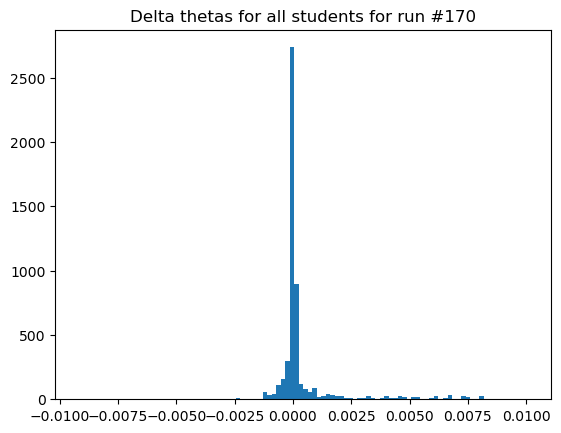

iteration # 171
iteration # 172
iteration # 173
iteration # 174
iteration # 175
iteration # 176
iteration # 177
iteration # 178
iteration # 179
iteration # 180


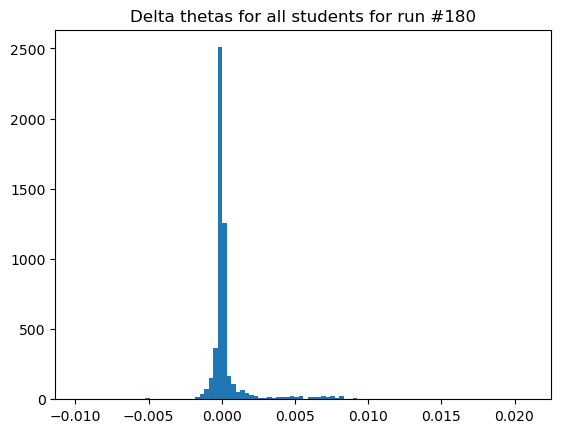

iteration # 181
iteration # 182
iteration # 183
iteration # 184
iteration # 185
iteration # 186
iteration # 187
iteration # 188
iteration # 189
iteration # 190


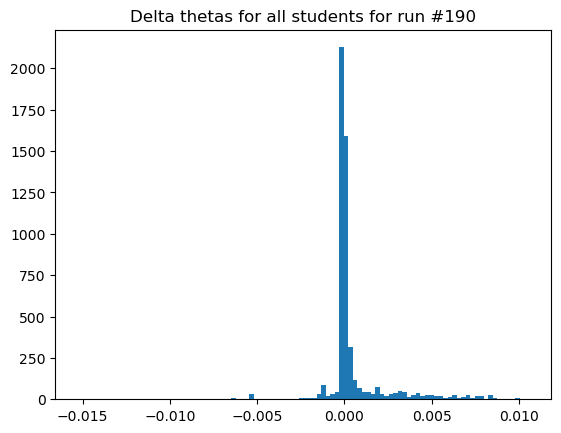

iteration # 191
iteration # 192
iteration # 193
iteration # 194
iteration # 195
iteration # 196
iteration # 197
iteration # 198
iteration # 199
iteration # 200


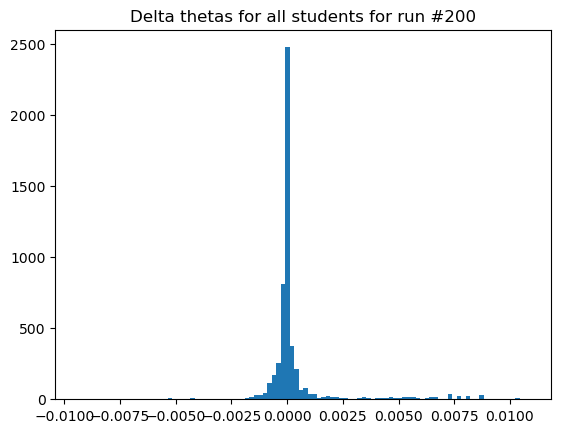

iteration # 201
iteration # 202
iteration # 203
iteration # 204
iteration # 205
iteration # 206
iteration # 207
iteration # 208
iteration # 209
iteration # 210


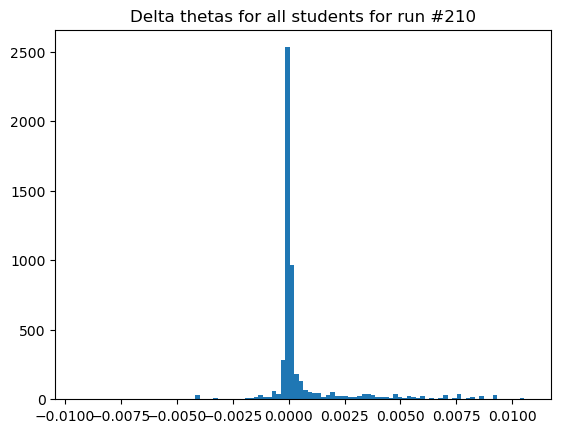

iteration # 211
iteration # 212
iteration # 213
iteration # 214
iteration # 215
iteration # 216
iteration # 217
iteration # 218
iteration # 219
iteration # 220


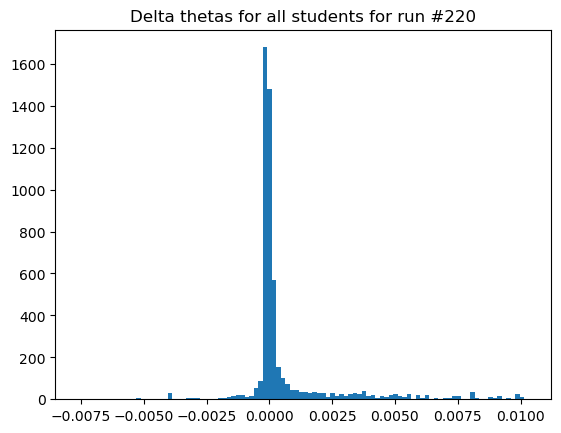

iteration # 221
iteration # 222
iteration # 223
iteration # 224
iteration # 225
iteration # 226
iteration # 227
iteration # 228
iteration # 229
iteration # 230


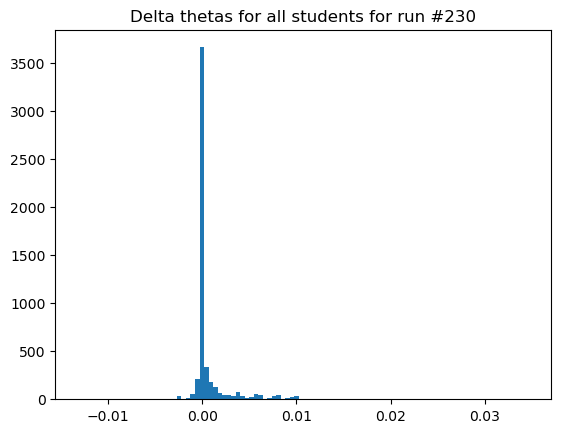

iteration # 231
iteration # 232
iteration # 233
iteration # 234
iteration # 235
iteration # 236
iteration # 237
iteration # 238
iteration # 239
iteration # 240


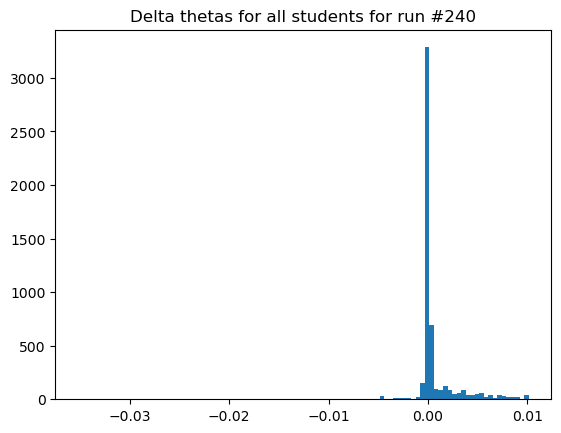

iteration # 241
iteration # 242
iteration # 243
iteration # 244
iteration # 245
iteration # 246
iteration # 247
iteration # 248
iteration # 249
parameter calculation time:  54.732431411743164  seconds.


In [41]:
#'standard' IRT where we operate on discretized data (0,1)

#run only one skill
skill_id='skillIDHere'

import time
start=time.time()
print('attempting to load skill from local data: '+str(skill_id))
df = irt_df[irt_df.skill_id==skill_id]
print('loading time: ', time.time()-start, ' for : ', len(df), np.shape(df))


table=customPyIRT.returnTable(df)
print('table size: ', np.shape(table))

#solve IRT
print('solving for item parameters...')
starttime = time.time()
solvedIRT_discrete = customPyIRT.solve_IRT_for_matrix(table, all_thetas = None, iterations = 250, 
                                   FOUR_PL=True, show_convergence=10,
                                   bounds = ((1,-3,0,.5),(100,3,.5,1)),verbose=True)
print('parameter calculation time: ', time.time()-starttime, ' seconds.')

#plots below show theta changes as model converges
#for more or less frequent plots, set show_convergence higher or lower
#for no output, set verbose=False

In [42]:
solvedIRT_discrete.auc_roc,solvedIRT_discrete.sample_size.values

(array([0.92946598, 0.94835046, 0.9045411 , 0.90769437, 0.8467366 ,
        0.79617368, 0.83276923, 0.95232386, 0.95260116, 0.81930969,
        0.85548246, 0.94597476, 0.93613652, 0.92840089, 0.90294118,
        0.78465737, 0.97456423, 0.94678903, 0.92934003, 0.97226612,
        0.81834555, 0.90231678, 0.88767593, 0.81179512, 0.91408833,
        0.94039704, 0.94989893]),
 array([ 477,  473, 2384, 2411,  478,  463,  479,  432,  466,  464,  422,
         433,  410,  468,  439, 2246,  458,  480,  413,  434,  436, 2088,
        2126,  441, 2095,  417,  404]))

In [43]:
solvedIRT_discrete.optimal_threshold, solvedIRT_discrete.tpr, solvedIRT_discrete.tnr

(array([0.5194229 , 0.38407249, 0.82155882, 0.64466836, 0.14426713,
        0.13177295, 0.13735427, 0.29231491, 0.31107595, 0.16402906,
        0.11781816, 0.28983942, 0.34024647, 0.13019727, 0.20232382,
        0.84001454, 0.07759501, 0.31323971, 0.26770668, 0.4478388 ,
        0.30682963, 0.93378498, 0.93245152, 0.26200513, 0.88721251,
        0.32534983, 0.27842489]),
 array([0.84120172, 0.90232558, 0.89676208, 0.93797277, 0.60227273,
        0.80434783, 0.76923077, 0.90957447, 0.85833333, 0.69387755,
        0.725     , 0.83333333, 0.8362069 , 0.87619048, 0.82352941,
        0.71082474, 0.96153846, 0.88068182, 0.81176471, 0.9144385 ,
        0.52173913, 0.85508736, 0.92129857, 0.58015267, 0.88423258,
        0.8839779 , 0.88990826]),
 array([0.91803279, 0.91085271, 0.76284585, 0.72663551, 0.91025641,
        0.62803235, 0.72533333, 0.8852459 , 0.94508671, 0.8715847 ,
        0.86842105, 0.92749245, 0.93197279, 0.8677686 , 0.85625   ,
        0.73856209, 0.88423645, 0.91118421, 0.92

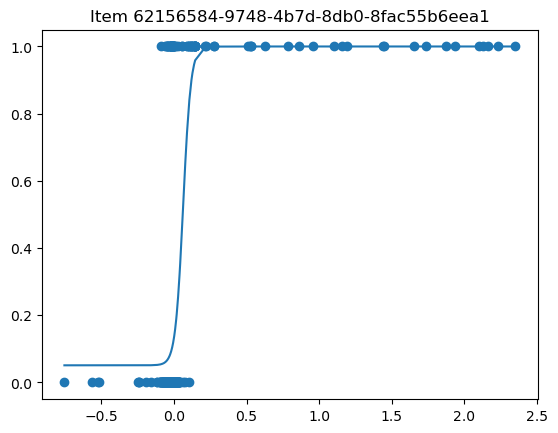

a : 37.37965718910165  b:  0.06371055421847498  c:  0.05109688168683672
d:  0.9999999999999999


In [44]:
model = customPyIRT.four_param_logistic
customPyIRT.plot_item_with_model(model, solvedIRT_discrete.thetas, 10, table,
                                 [n[10] for n in solvedIRT_discrete.est_params[:4]])

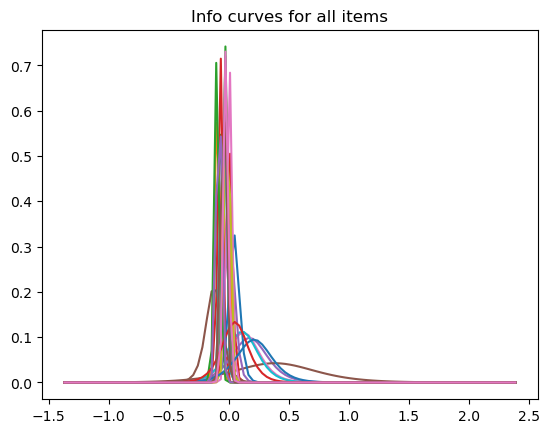

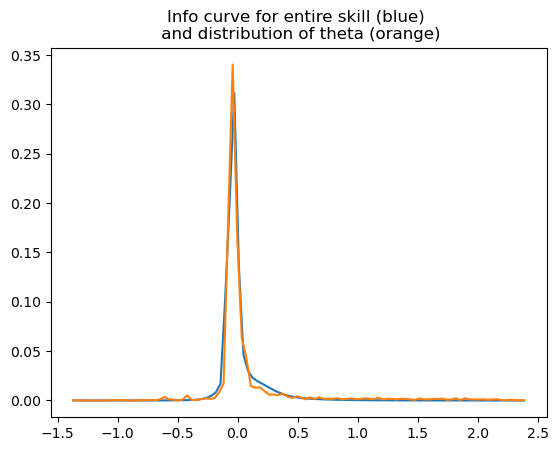

In [45]:
customPyIRT.plot_information_curves(model, table,solvedIRT_discrete.thetas,
                                    solvedIRT_discrete.est_params[:4])


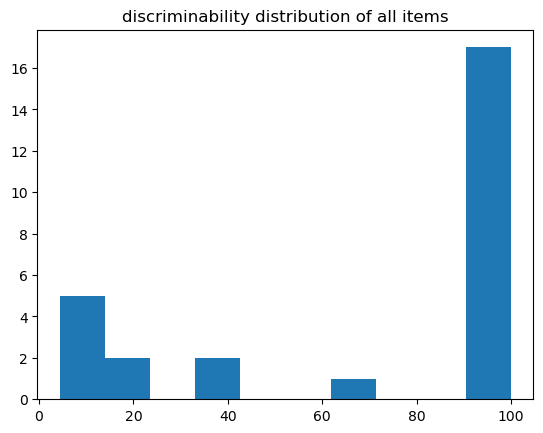

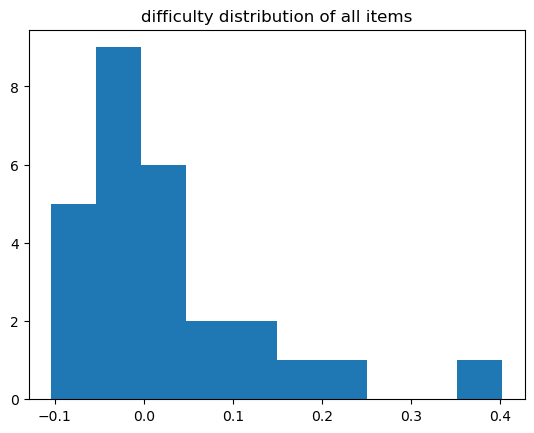

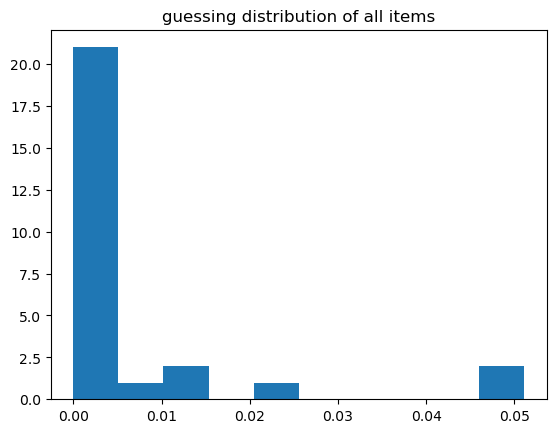

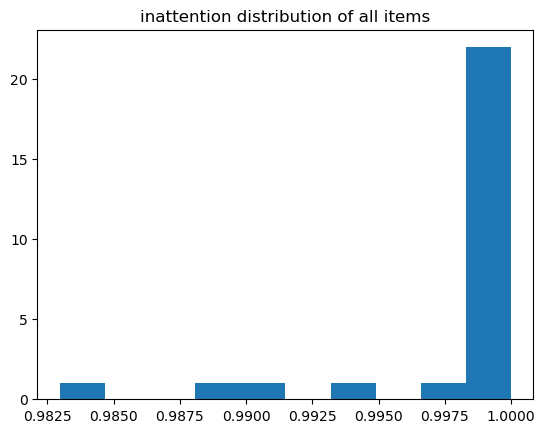

In [46]:
customPyIRT.distributionsOfEstimatedItemParameters(solvedIRT_discrete)

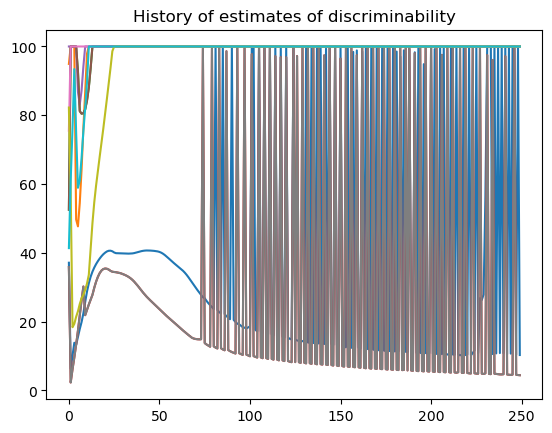

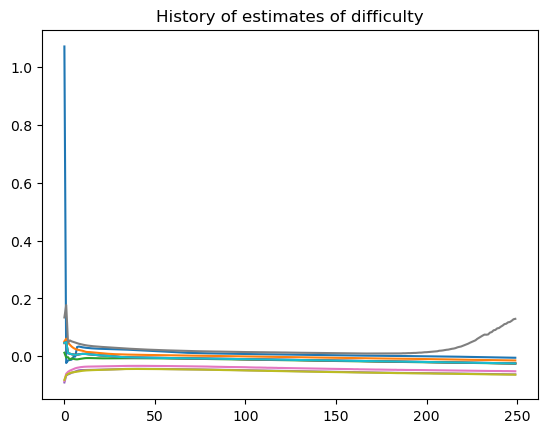

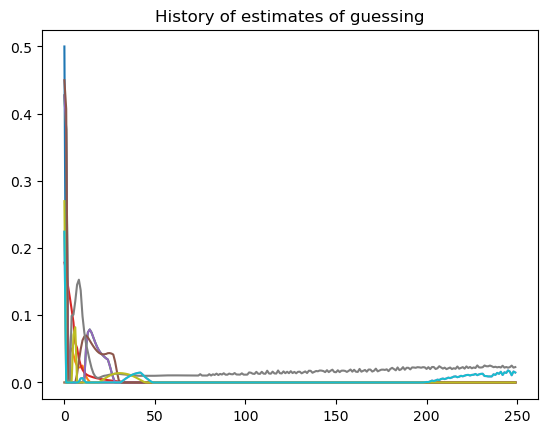

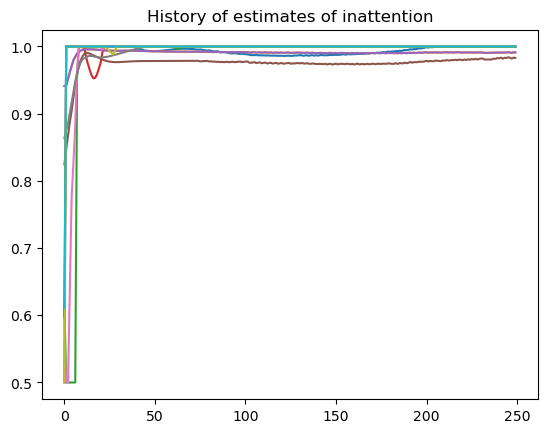

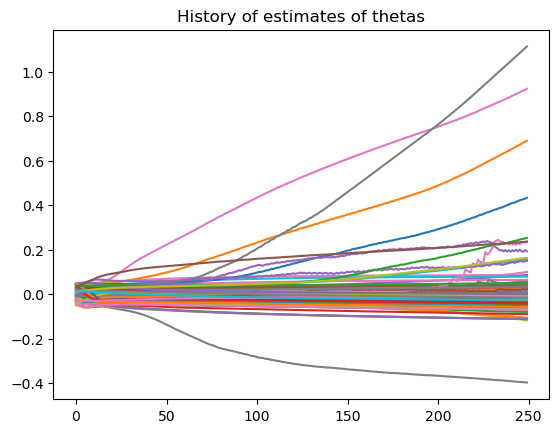

In [47]:
customPyIRT.plot_sample_parameter_convergence(solvedIRT_discrete) #, sample_of_items = 10,sample_of_students = 100)

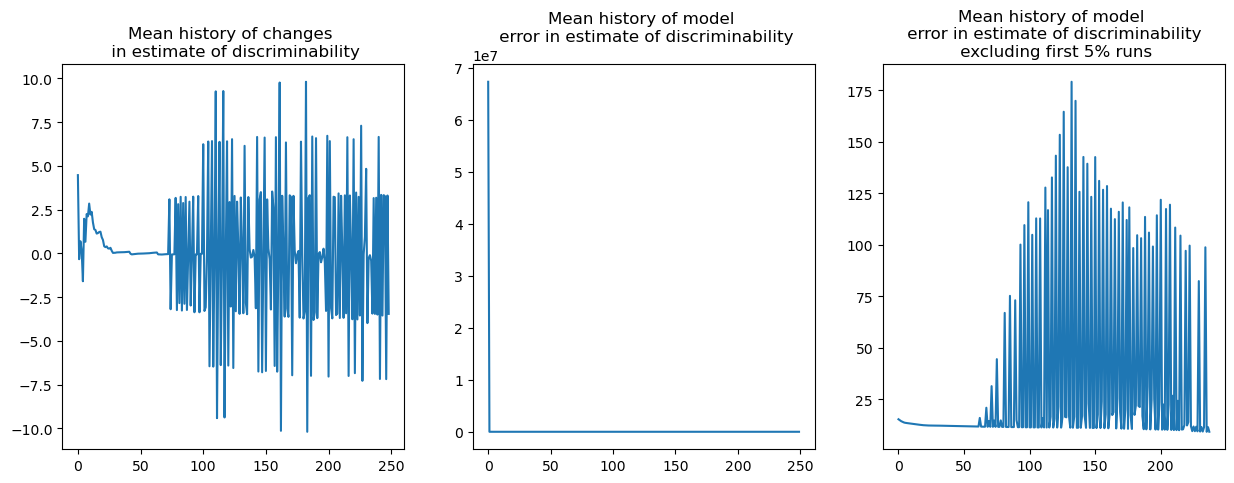

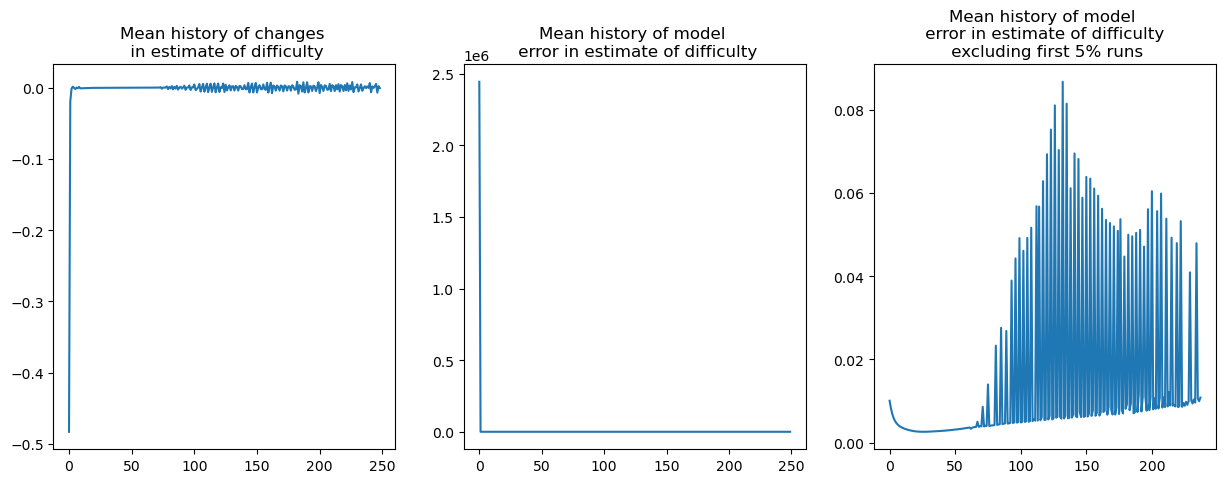

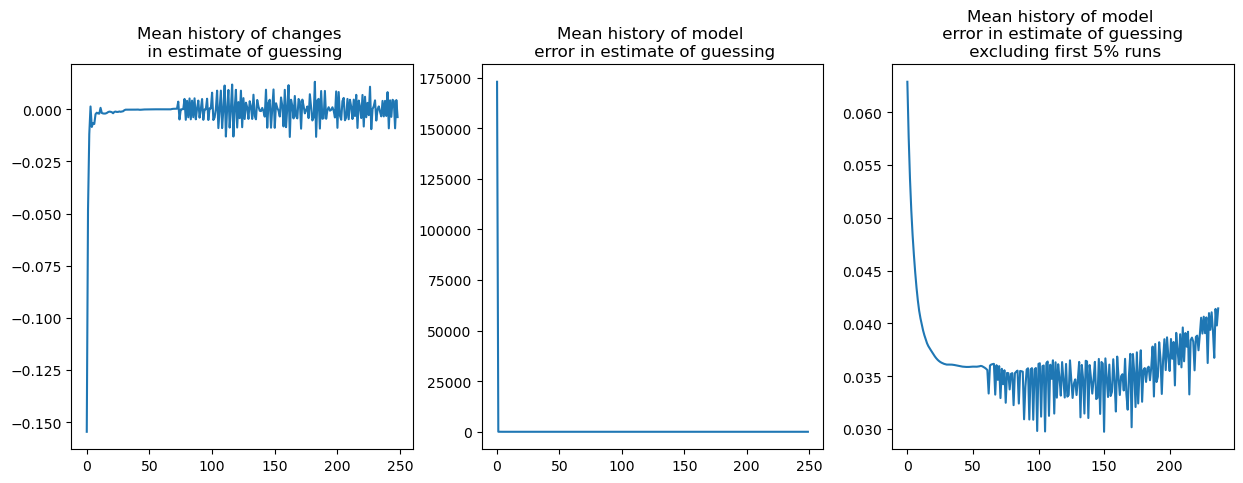

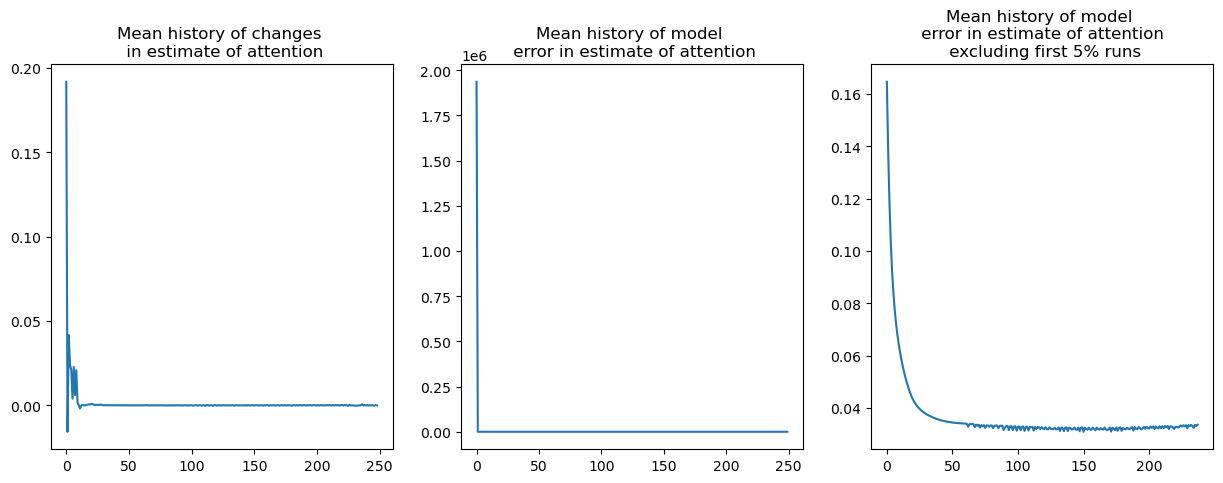

In [48]:
customPyIRT.timeCourseOfParameterConvergence(solvedIRT_discrete)

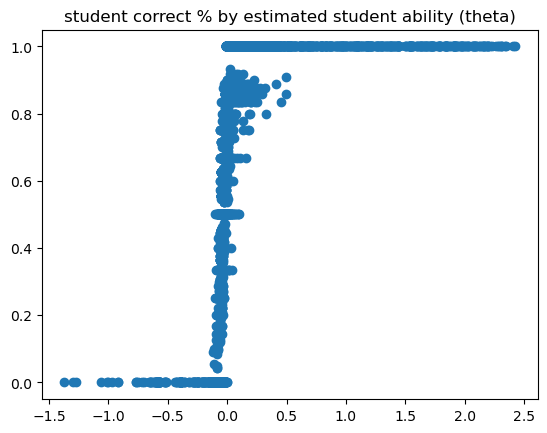

Correlation:  0.4317348509881906


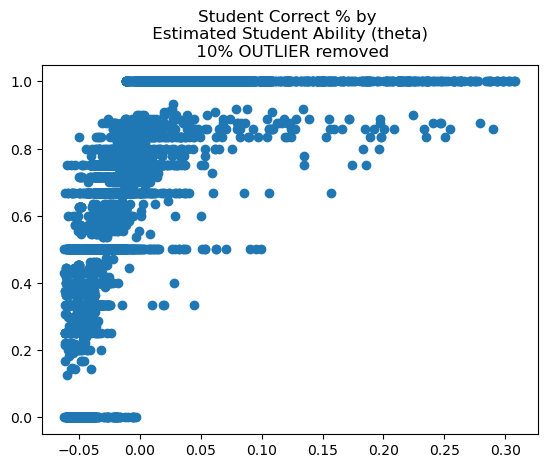

Correlation:  0.6110964643383027


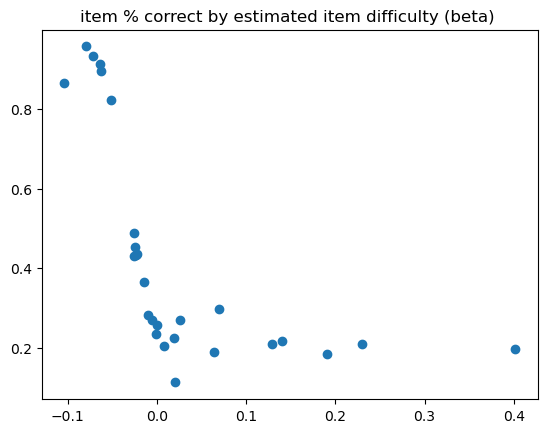

Correlation:  -0.6119181871518798


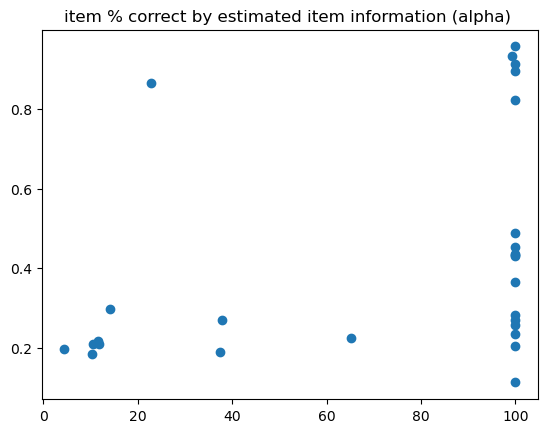

Correlation:  0.36577045021487326


In [49]:
customPyIRT.correlationOfParametersByPerformance(solvedIRT_discrete)

attempting to load skill from local data: yvapiriy
loading time:  0.996483325958252  for :  33559 (33559, 4)
large correctness values detected, normalizing table
table size:  (5271, 27)
solving for item parameters...
iteration # 0


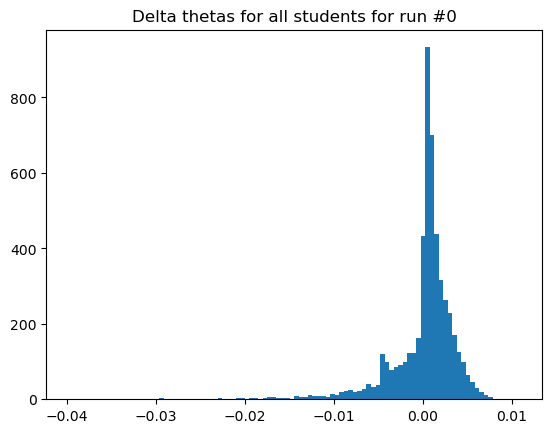

iteration # 1
iteration # 2
iteration # 3
iteration # 4
iteration # 5
iteration # 6
iteration # 7
iteration # 8
iteration # 9
iteration # 10


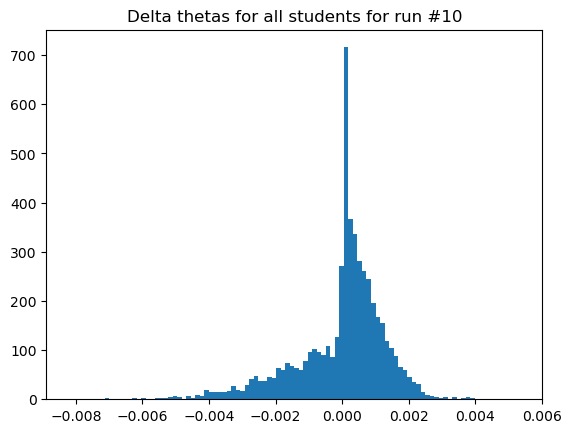

iteration # 11
iteration # 12
iteration # 13
iteration # 14
iteration # 15
iteration # 16
iteration # 17
iteration # 18
iteration # 19
iteration # 20


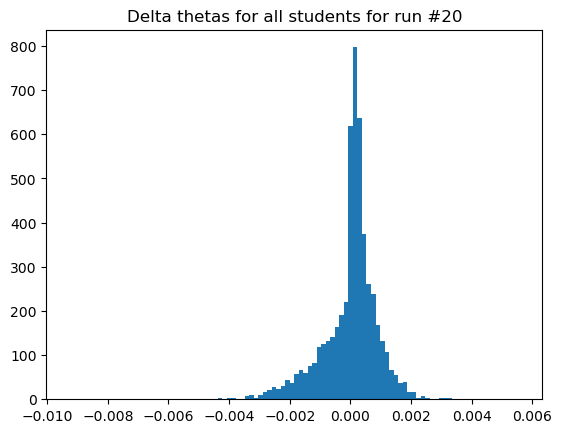

iteration # 21
iteration # 22
iteration # 23
iteration # 24
iteration # 25
iteration # 26
iteration # 27
iteration # 28
iteration # 29
iteration # 30


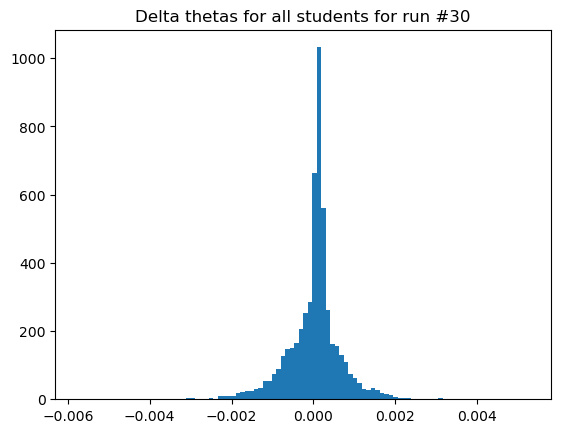

iteration # 31
iteration # 32
iteration # 33
iteration # 34
iteration # 35
iteration # 36
iteration # 37
iteration # 38
iteration # 39
iteration # 40


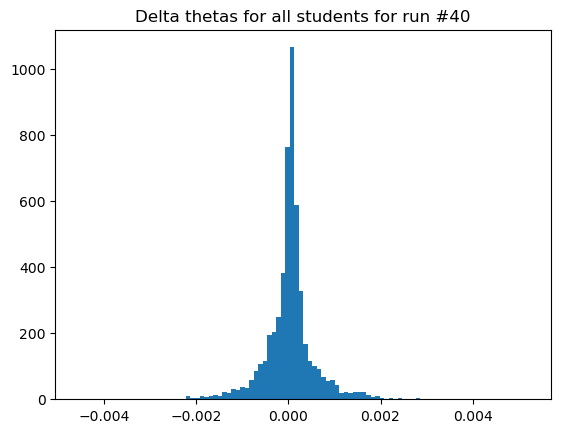

iteration # 41
iteration # 42
iteration # 43
iteration # 44
iteration # 45
iteration # 46
iteration # 47
iteration # 48
iteration # 49
iteration # 50


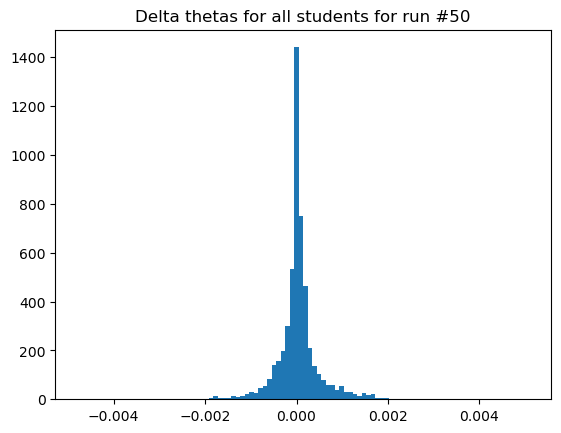

iteration # 51
iteration # 52
iteration # 53
iteration # 54
iteration # 55
iteration # 56
iteration # 57
iteration # 58
iteration # 59
iteration # 60


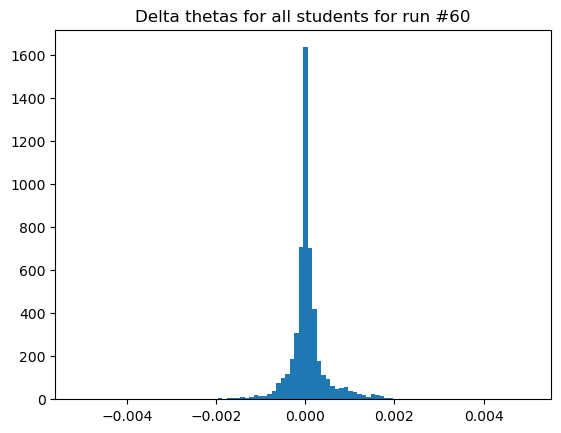

iteration # 61
iteration # 62
iteration # 63
iteration # 64
iteration # 65
iteration # 66
iteration # 67
iteration # 68
iteration # 69
iteration # 70


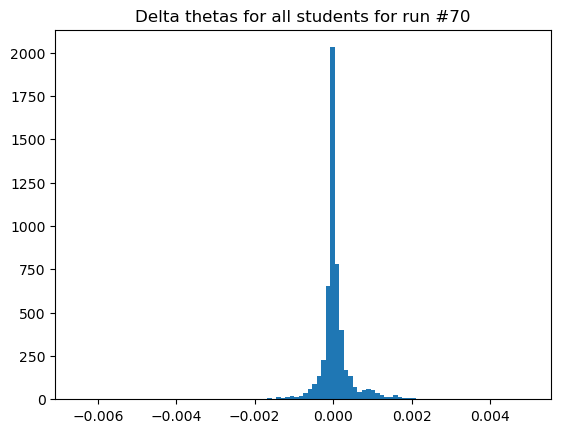

iteration # 71
iteration # 72
iteration # 73
iteration # 74
iteration # 75
iteration # 76
iteration # 77
iteration # 78
iteration # 79
iteration # 80


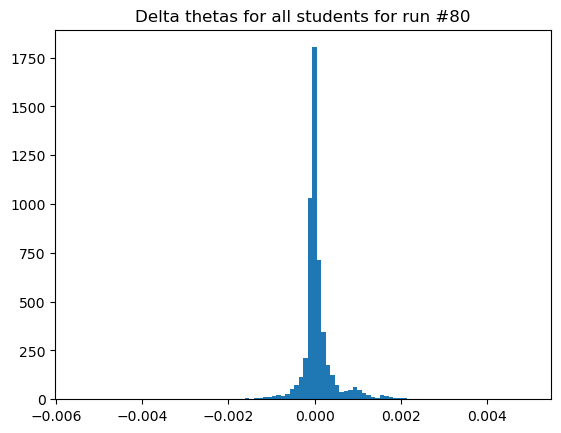

iteration # 81
iteration # 82
iteration # 83
iteration # 84
iteration # 85
iteration # 86
iteration # 87
iteration # 88
iteration # 89
iteration # 90


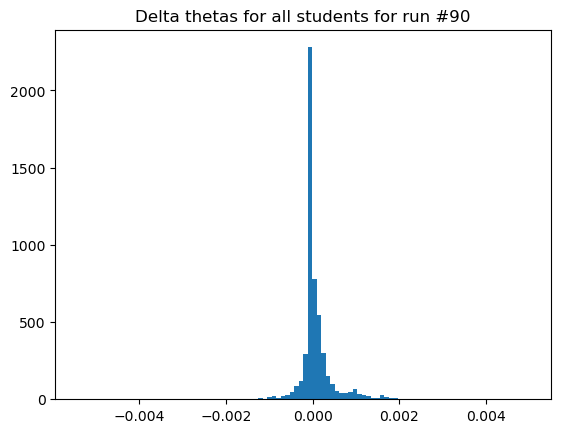

iteration # 91
iteration # 92
iteration # 93
iteration # 94
iteration # 95
iteration # 96
iteration # 97
iteration # 98
iteration # 99
iteration # 100


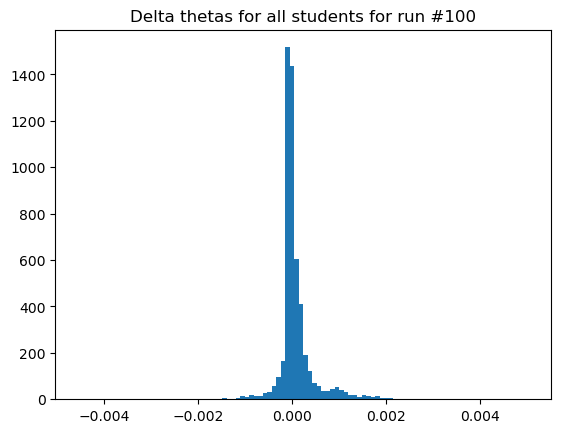

iteration # 101
iteration # 102
iteration # 103
iteration # 104
iteration # 105
iteration # 106
iteration # 107
iteration # 108
iteration # 109
iteration # 110


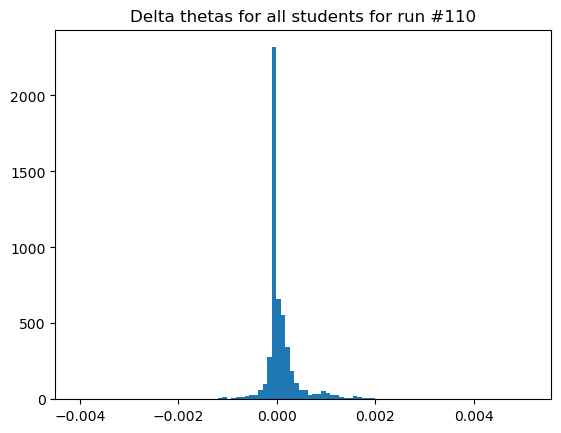

iteration # 111
iteration # 112
iteration # 113
iteration # 114
iteration # 115
iteration # 116
iteration # 117
iteration # 118
iteration # 119
iteration # 120


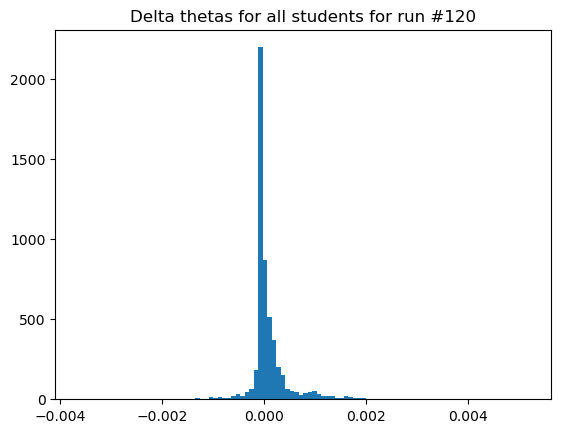

iteration # 121
iteration # 122
iteration # 123
iteration # 124
iteration # 125
iteration # 126
iteration # 127
iteration # 128
iteration # 129
iteration # 130


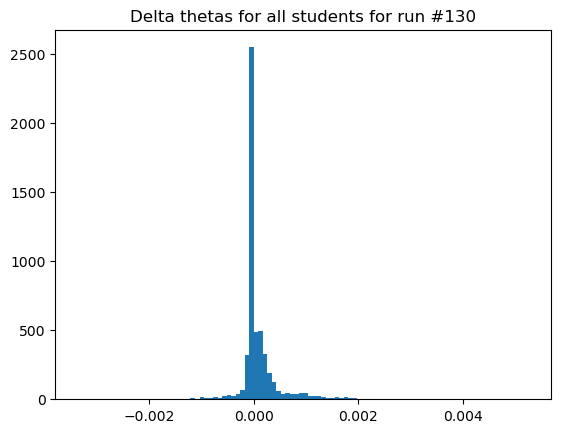

iteration # 131
iteration # 132
iteration # 133
iteration # 134
iteration # 135
iteration # 136
iteration # 137
iteration # 138
iteration # 139
iteration # 140


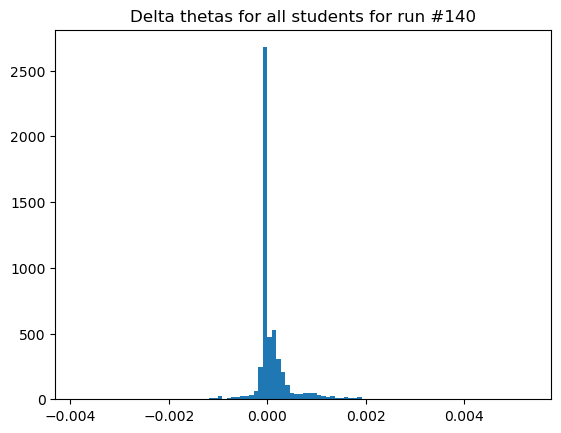

iteration # 141
iteration # 142
iteration # 143
iteration # 144
iteration # 145
iteration # 146
iteration # 147
iteration # 148
iteration # 149
iteration # 150


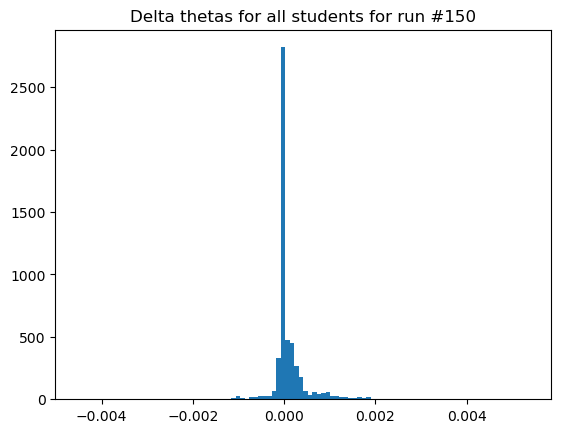

iteration # 151
iteration # 152
iteration # 153
iteration # 154
iteration # 155
iteration # 156
iteration # 157
iteration # 158
iteration # 159
iteration # 160


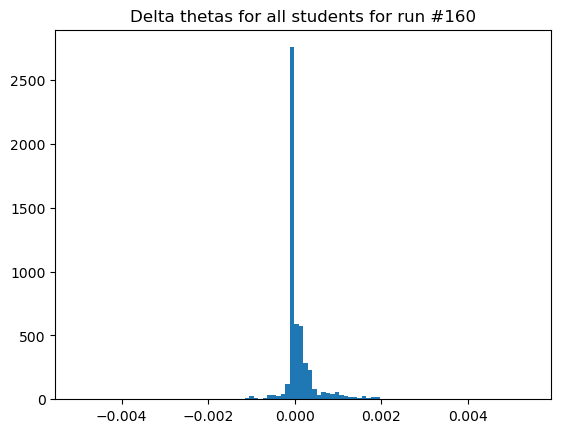

iteration # 161
iteration # 162
iteration # 163
iteration # 164
iteration # 165
iteration # 166
iteration # 167
iteration # 168
iteration # 169
iteration # 170


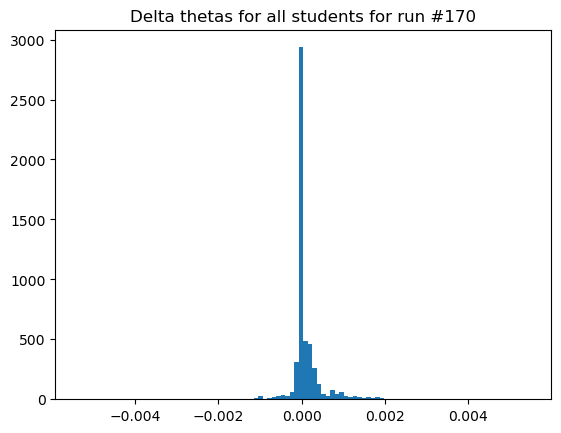

iteration # 171
iteration # 172
iteration # 173
iteration # 174
iteration # 175
iteration # 176
iteration # 177
iteration # 178
iteration # 179
iteration # 180


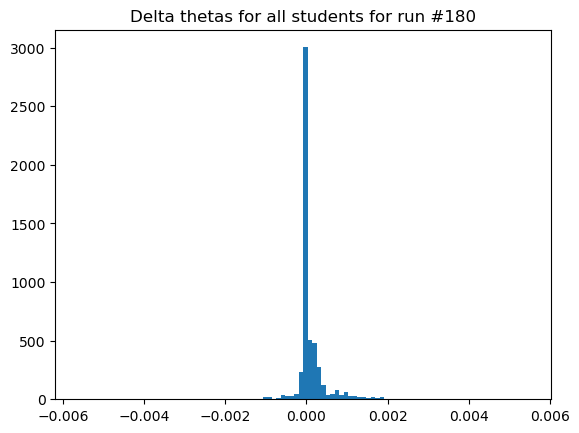

iteration # 181
iteration # 182
iteration # 183
iteration # 184
iteration # 185
iteration # 186
iteration # 187
iteration # 188
iteration # 189
iteration # 190


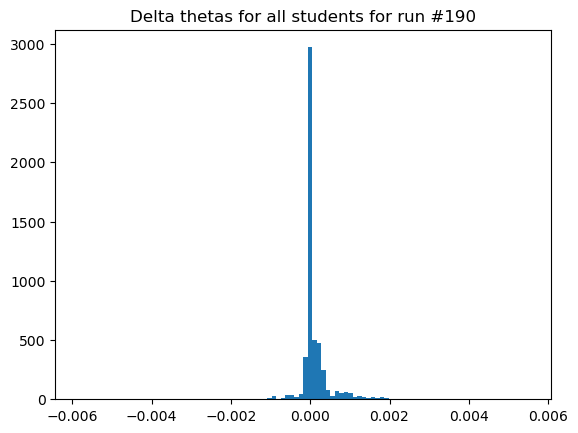

iteration # 191
iteration # 192
iteration # 193
iteration # 194
iteration # 195
iteration # 196
iteration # 197
iteration # 198
iteration # 199
iteration # 200


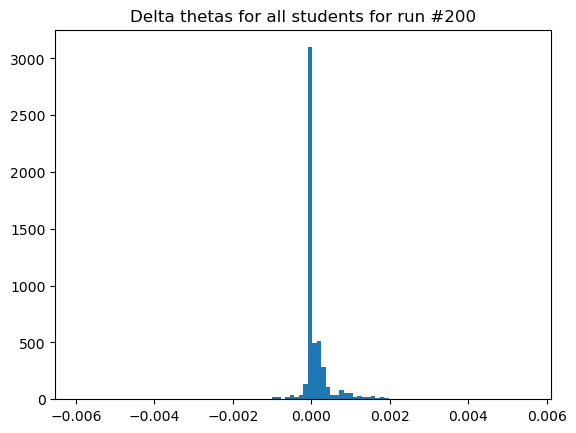

iteration # 201
iteration # 202
iteration # 203
iteration # 204
iteration # 205
iteration # 206
iteration # 207
iteration # 208
iteration # 209
iteration # 210


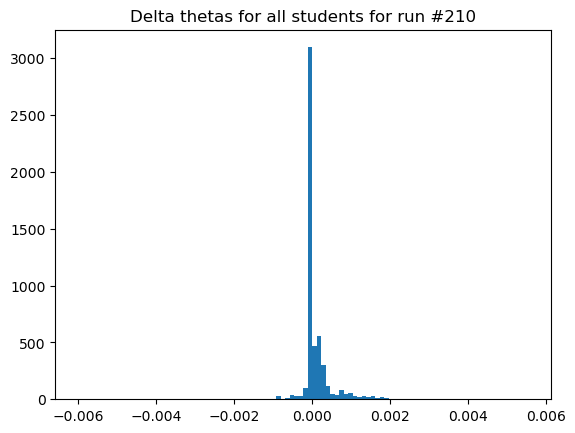

iteration # 211
iteration # 212
iteration # 213
iteration # 214
iteration # 215
iteration # 216
iteration # 217
iteration # 218
iteration # 219
iteration # 220


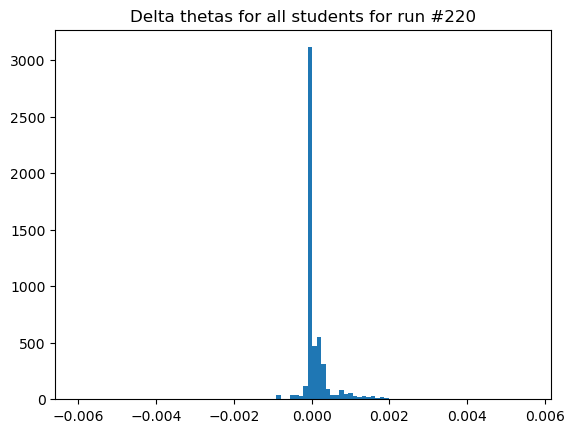

iteration # 221
iteration # 222
iteration # 223
iteration # 224
iteration # 225
iteration # 226
iteration # 227
iteration # 228
iteration # 229
iteration # 230


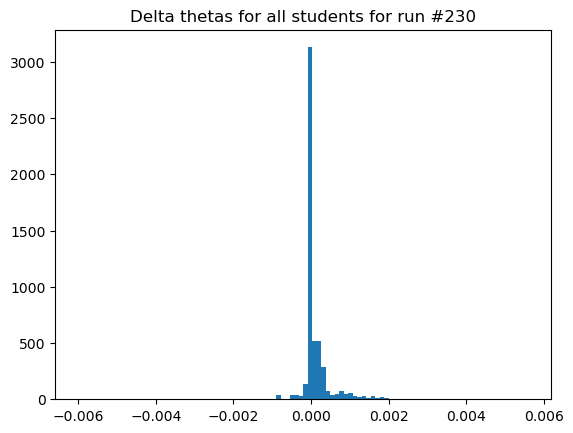

iteration # 231
iteration # 232
iteration # 233
iteration # 234
iteration # 235
iteration # 236
iteration # 237
iteration # 238
iteration # 239
iteration # 240


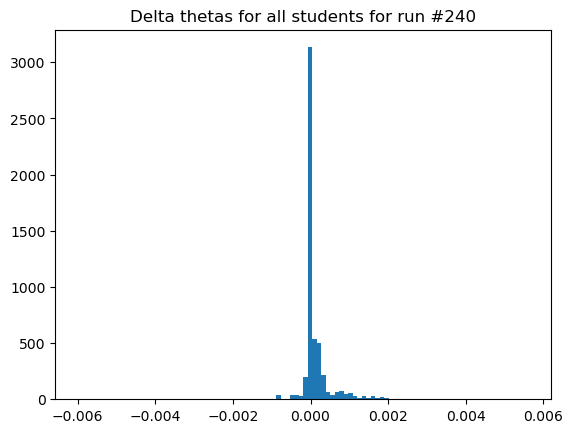

iteration # 241
iteration # 242
iteration # 243
iteration # 244
iteration # 245
iteration # 246
iteration # 247
iteration # 248
iteration # 249
continuous values detected, using custom ROC functions for  033ac938-c74a-41a0-91ac-fdfe44b1f2ac
continuous values detected, using custom ROC functions for  065b1df2-f83e-4b31-990e-a4efc5831408
continuous values detected, using custom ROC functions for  142a164d-083f-4bcb-ba22-c9ecc801db41
continuous values detected, using custom ROC functions for  212901a4-4e01-4c66-9861-26f5dfa95d55
continuous values detected, using custom ROC functions for  2acbf0ca-6b7d-4333-bd0c-fa6bf6c646c5
continuous values detected, using custom ROC functions for  32a5f03e-122b-49d6-bf30-466a1e79f61b
continuous values detected, using custom ROC functions for  3a1c30c0-f901-4ac1-a991-c6fc065fcd86
continuous values detected, using custom ROC functions for  554e5eb4-02f9-403d-9f42-ab652786e930
continuous values detected, using custom ROC functions for  62156584-9748-4b7d-8

In [50]:
#try single skill with non-discrete (continuous) performance data

import time
start=time.time()
print('attempting to load skill from local data: '+str(skill_id))
df = irt_df[irt_df.skill_id==skill_id]
print('loading time: ', time.time()-start, ' for : ', len(df), np.shape(df))

#don't round correctness, set to False
table=customPyIRT.returnTable(df,False)
print('table size: ', np.shape(table))

#solve IRT
print('solving for item parameters...')
starttime = time.time()
solvedIRT_continuous = customPyIRT.solve_IRT_for_matrix(table, all_thetas = None, iterations = 250, 
                                   FOUR_PL=True, show_convergence=10,
                                   bounds = ((1,-3,0,.5),(100,3,.5,1)),verbose=True)
print('parameter calculation time: ', time.time()-starttime, ' seconds.')


In [51]:
solvedIRT_continuous.auc_roc,solvedIRT_continuous.sample_size.values

(array([0.91366565, 0.91418399, 0.77703504, 0.79944717, 0.85455488,
        0.85626212, 0.88373438, 0.92931612, 0.89923882, 0.86379074,
        0.88184137, 0.90017682, 0.90149351, 0.87699708, 0.90501995,
        0.8106883 , 0.82235272, 0.89988754, 0.87977311, 0.92837927,
        0.87981534, 0.78068772, 0.9099112 , 0.91437066, 0.83327137,
        0.94300014, 0.9116481 ]),
 array([ 477,  473, 2384, 2411,  478,  463,  479,  432,  466,  464,  422,
         433,  410,  468,  439, 2246,  458,  480,  413,  434,  436, 2088,
        2126,  441, 2095,  417,  404]))

In [52]:
solvedIRT_continuous.optimal_threshold, solvedIRT_continuous.tpr, solvedIRT_continuous.tnr

(array([0.72989966, 0.79105936, 0.90525639, 0.8563062 , 0.65655039,
        0.66463512, 0.63995298, 0.64609387, 0.59185127, 0.59423309,
        0.66614518, 0.61263518, 0.63029683, 0.63212894, 0.70774827,
        0.8876206 , 0.54337305, 0.7006957 , 0.61933687, 0.71097434,
        0.60890757, 0.9347957 , 0.95171041, 0.65334348, 0.95108019,
        0.69870887, 0.63762047]),
 array([0.83184799, 0.73794217, 0.50351947, 0.51336359, 0.78290801,
        0.76915165, 0.79647696, 0.83720283, 0.8588711 , 0.76959586,
        0.73646297, 0.82139253, 0.79099849, 0.79963348, 0.76139586,
        0.54896907, 0.781267  , 0.78511088, 0.78967473, 0.77446085,
        0.81905867, 0.55035971, 0.91096901, 0.81532691, 0.53012048,
        0.82992844, 0.81424644]),
 array([0.84040606, 0.91188569, 0.89328063, 0.96261682, 0.77373408,
        0.78235039, 0.82557832, 0.86538594, 0.77471196, 0.80116204,
        0.87409949, 0.82114748, 0.85357424, 0.78435445, 0.88688225,
        0.94444444, 0.71111111, 0.85311986, 0.80

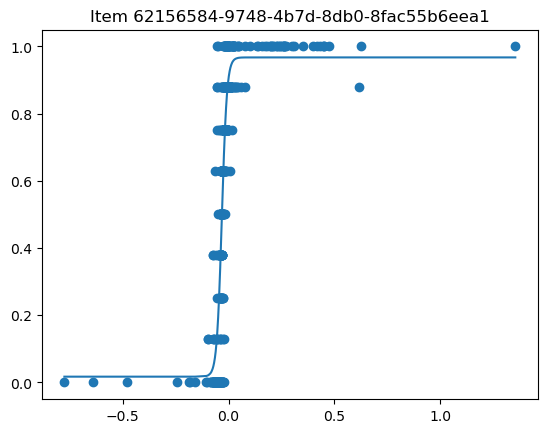

a : 84.29721927245306  b:  -0.031992702446869394  c:  0.017300679660984534
d:  0.967453559768489


In [53]:
model = customPyIRT.four_param_logistic

customPyIRT.plot_item_with_model(model, solvedIRT_continuous.thetas, 10, table,
                                 [n[10] for n in solvedIRT_continuous.est_params[:4]])

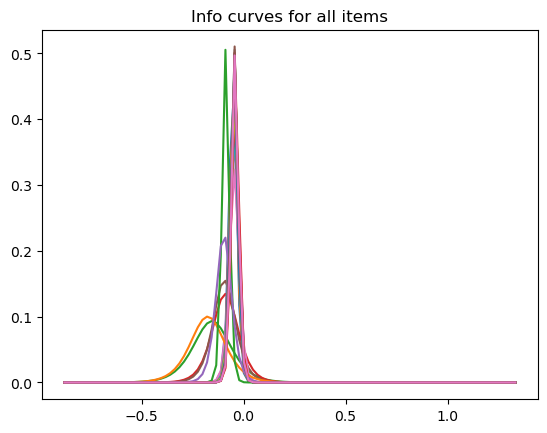

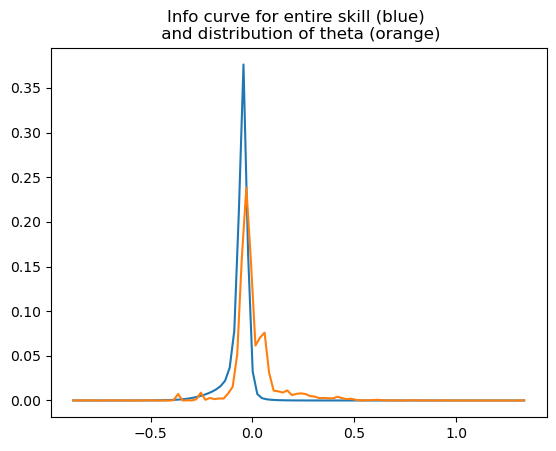

In [54]:
customPyIRT.plot_information_curves(model, table,solvedIRT_continuous.thetas,
                                    solvedIRT_continuous.est_params[:4])


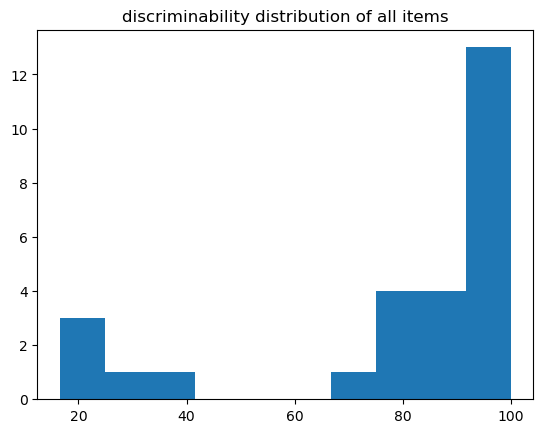

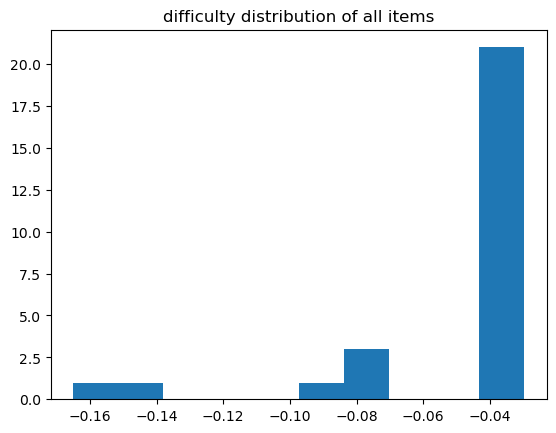

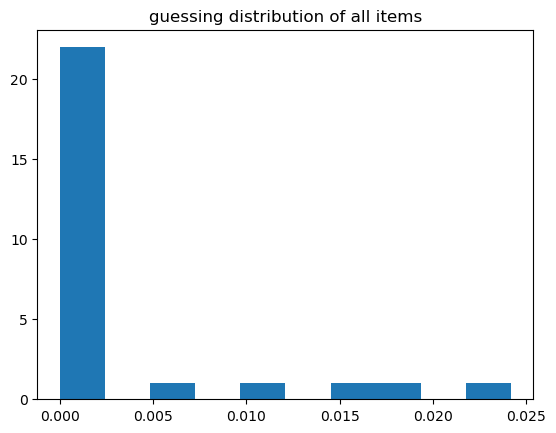

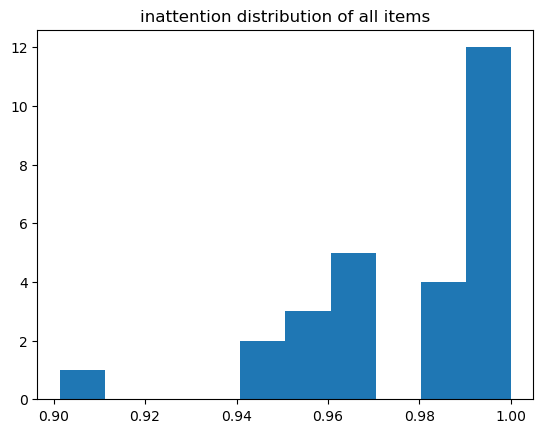

In [55]:
customPyIRT.distributionsOfEstimatedItemParameters(solvedIRT_continuous)

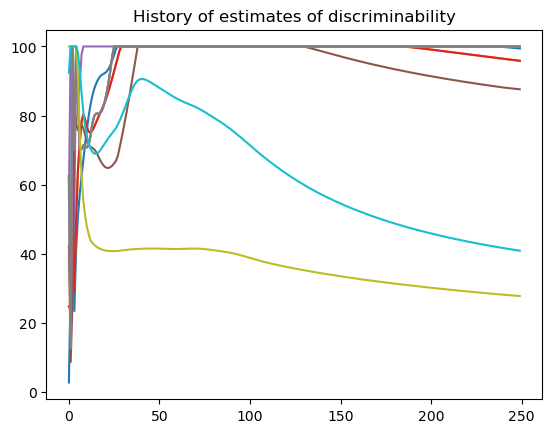

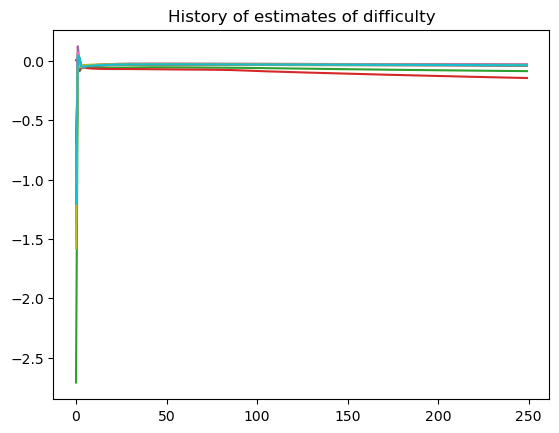

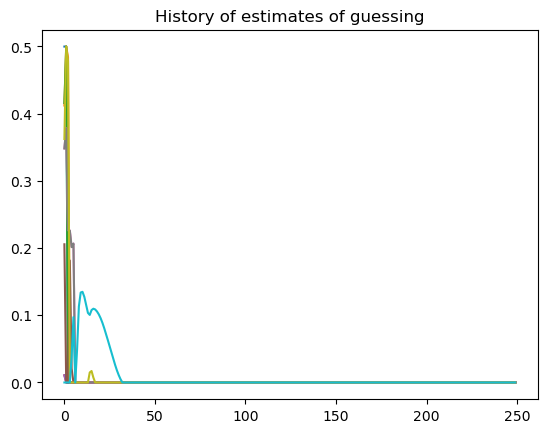

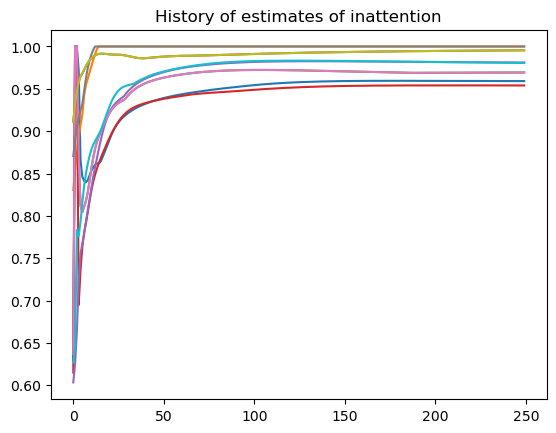

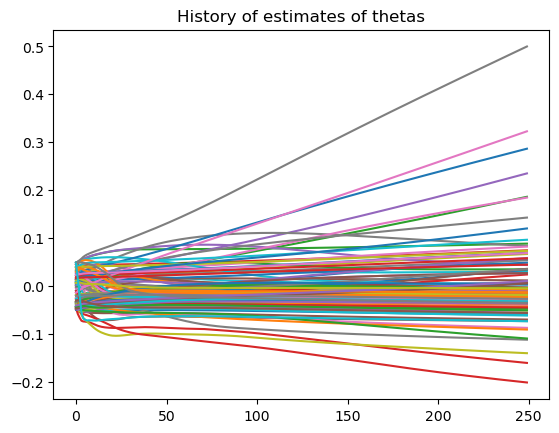

In [56]:
customPyIRT.plot_sample_parameter_convergence(solvedIRT_continuous) #, sample_of_items = 10,sample_of_students = 100)

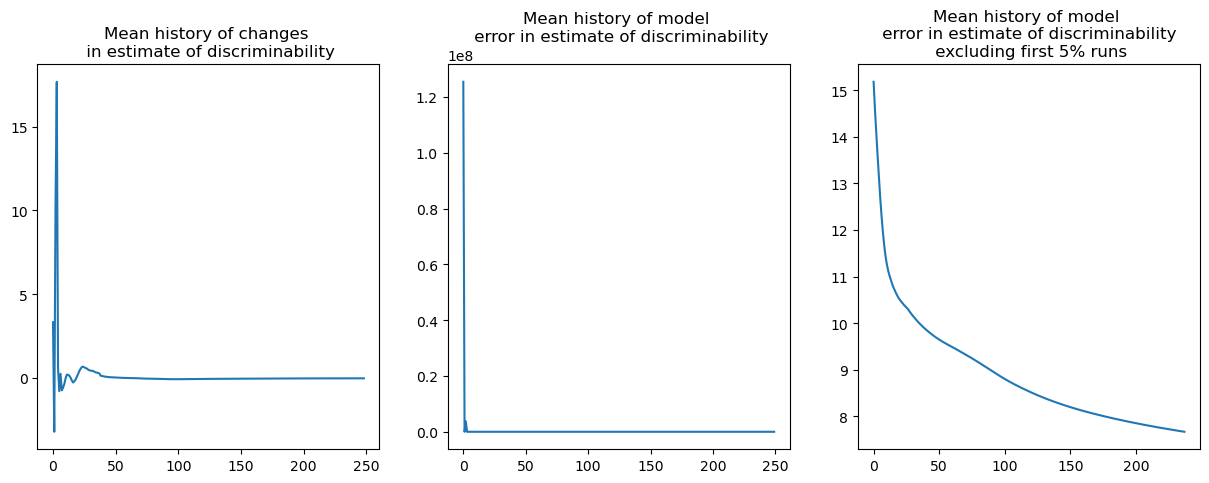

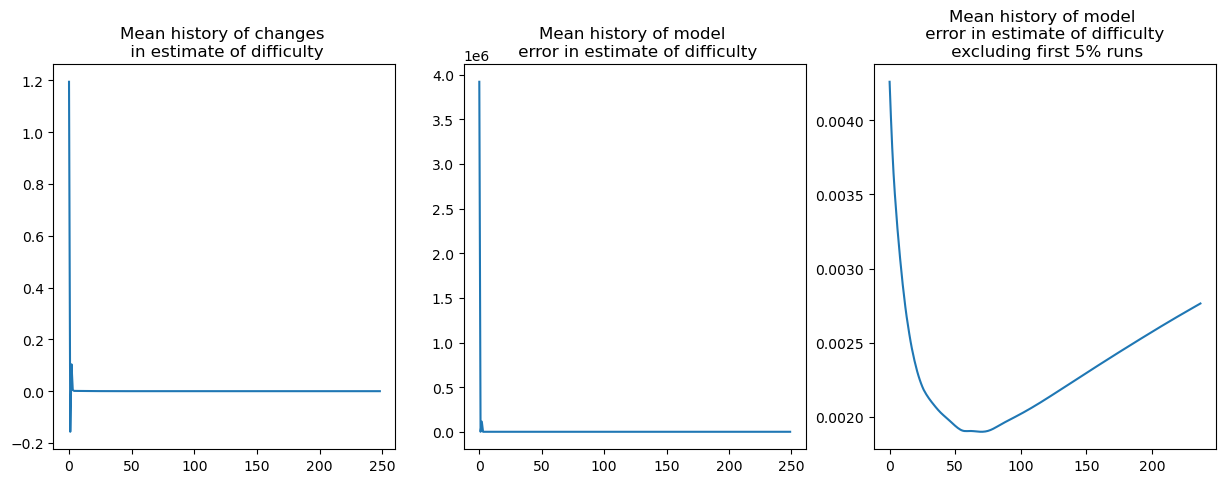

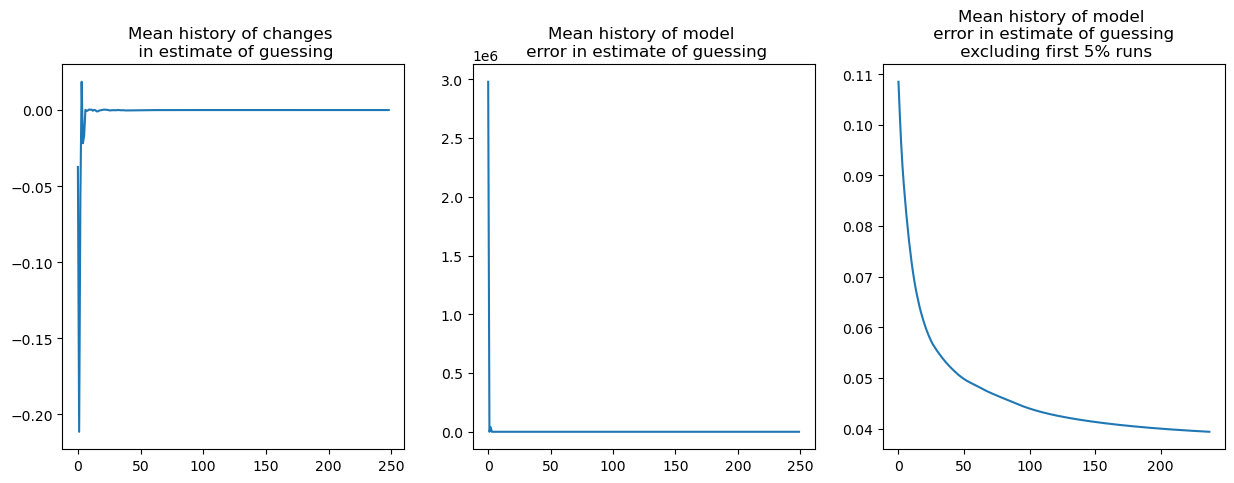

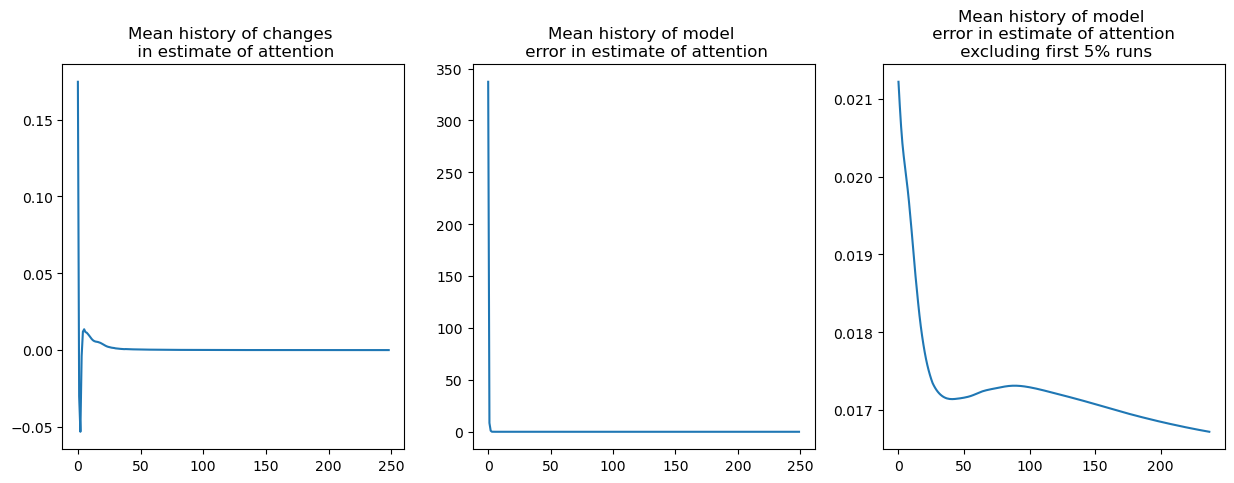

In [57]:
customPyIRT.timeCourseOfParameterConvergence(solvedIRT_continuous)

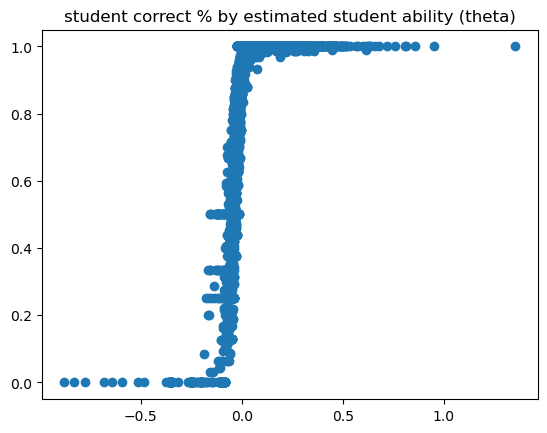

Correlation:  0.6040470017536579


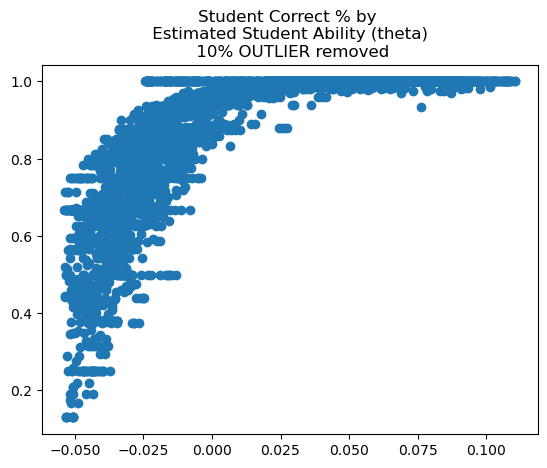

Correlation:  0.6914746539475297


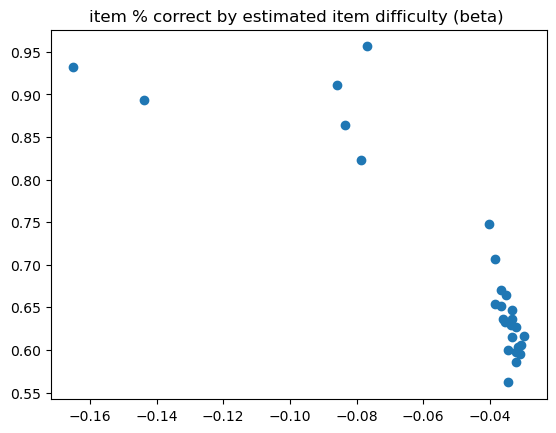

Correlation:  -0.8552650501968048


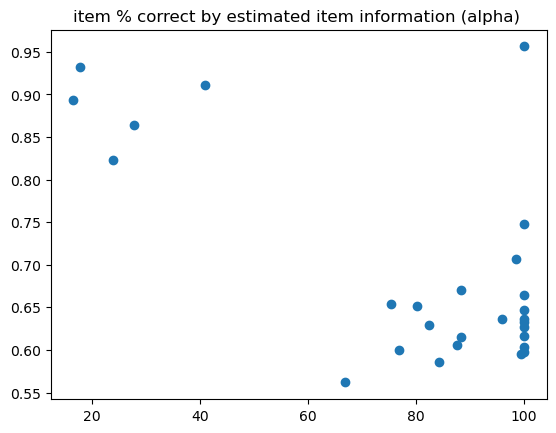

Correlation:  -0.6698992537696019


In [58]:
customPyIRT.correlationOfParametersByPerformance(solvedIRT_continuous)

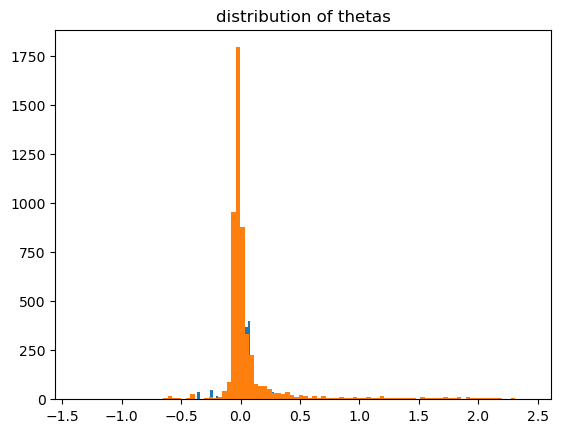

theta parameter correl:  0.7370620291010034
discriminability parameter correl:  -0.04401992920417886
difficulty parameter correl:  0.41007785966881055
guessing parameter correl:  0.18448942284427122
atttention parameter correl:  -0.35653031329118284
auc_roc parameter correl:  0.285479890621473
optimal_threshold parameter correl:  0.9265026653386577
tpr parameter correl:  -0.12511181762585916
tnr parameter correl:  -0.10530072810557474


In [61]:
customPyIRT.compareRuns(solvedIRT_continuous,solvedIRT_discrete)

In [ ]:
#Now try library on a whole set of skills

In [3]:
filename, version = 'ItemParametersv11.csv', '1.1'
restart_index=0
skills_calculated = 0
count=0 + restart_index

#this is just for the example below where we sometimes discretize and sometimes don't
unique_skillls = []

In [ ]:
#Run IRT on all skills
print('starting IRT/SDT parameter calculation for ',filename,' version: ', version)

for skill_id in los[restart_index:]:
    print('skill #: ',count+1,' skill_id: ', skill_id)

    try:
        #ETL for this skill
        start=time.time()
        print('attempting to load skill from local data: '+str(skill_id))
        df = irt_df[irt_df.skill_id==skill_id]
        print('loading time: ', time.time()-start, ' for : ', len(df), np.shape(df))

        #don't round correctness for certain_skills (unique_skills)
        if skill_id in unique_skills:
            table=customPyIRT.returnTable(df,False)
        else:
            table=customPyIRT.returnTable(df)

        #table=customPyIRT.returnTable(df)
        print('table size: ', np.shape(table))


        #solve IRT
        print('solving for item parameters...')
        starttime = time.time()
        solvedIRTSDT = customPyIRT.solve_IRT_for_matrix(table, all_thetas = None, 
                                           iterations = 250, 
                                           FOUR_PL=True, show_convergence=0,
                                           bounds = ((1,-3,0,.5),(100,3,.5,1)))
        print('parameter calculation time: ', time.time()-starttime, ' seconds.')


        if np.isnan(solvedIRTSDT.est_params[1]).sum() > 0:
            print('nans in est params: '+ str( np.isnan(solvedIRTSDT.est_params[1]).sum())+ ' out of ', np.size(solvedIRTSDT.est_params[1]))
        if np.isnan(solvedIRTSDT.auc_roc).sum()>0:
            print('nans in auc_roc: '+ str( np.isnan(solvedIRTSDT.auc_roc).sum())+ ' out of '+ str( np.size(solvedIRTSDT.auc_roc)))
        if np.isnan(solvedIRTSDT.optimal_threshold).sum()>0:
            print('nans in optimal_threshold: '+ str(np.isnan(solvedIRTSDT.optimal_threshold).sum())+ ' out of '+ str(np.size(solvedIRTSDT.optimal_threshold)))


        #write out csv to local directory -- change this for lambda or other resource to appropriate dir
        customPyIRT.export_object_to_csv(solvedIRTSDT, skill_id, filename, version)

        skills_calculated +=1

    except:
        print('skipping ',skill_id, ' either loading or estimating broke.')
        
    count+=1

print('finished with ',str(count),' skills queried and calculated.')


In [6]:
print(str(len(los)), ' skills.')
print('version: ', version, ' filename: ', filename)



1034  skills.
version:  1.1  filename:  ItemParametersv11.csv


In [ ]:
#join new IRT csv file with data and model again (in new file)